<a href="https://colab.research.google.com/github/GaneshKolt/inframind_3_edge_computing/blob/master/edge_computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing Dependencies**

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!cp -avr /gdrive/My\ Drive/Detected/Detection /content

'/gdrive/My Drive/Detected/Detection' -> '/content/Detection'
'/gdrive/My Drive/Detected/Detection/CONTRIBUTING.md' -> '/content/Detection/CONTRIBUTING.md'
'/gdrive/My Drive/Detected/Detection/README.md' -> '/content/Detection/README.md'
'/gdrive/My Drive/Detected/Detection/__init__.py' -> '/content/Detection/__init__.py'
'/gdrive/My Drive/Detected/Detection/anchor_generators' -> '/content/Detection/anchor_generators'
'/gdrive/My Drive/Detected/Detection/anchor_generators/__init__.py' -> '/content/Detection/anchor_generators/__init__.py'
'/gdrive/My Drive/Detected/Detection/anchor_generators/flexible_grid_anchor_generator.py' -> '/content/Detection/anchor_generators/flexible_grid_anchor_generator.py'
'/gdrive/My Drive/Detected/Detection/anchor_generators/flexible_grid_anchor_generator_test.py' -> '/content/Detection/anchor_generators/flexible_grid_anchor_generator_test.py'
'/gdrive/My Drive/Detected/Detection/anchor_generators/grid_anchor_generator.py' -> '/content/Detection/anchor_gen

In [0]:
cp -avr /content/drive/My\ Drive/object-detection/images /content/object-detection


In [0]:
!pip install pillow
!pip install lxml
!pip install Cython
!pip install jupyter
!pip install matplotlib
!pip install pandas
!pip install opencv-python
!apt-get install -qq protobuf-compiler python-tk
!pip install -q Cython contextlib2 pillow lxml matplotlib PyDrive
!pip install -q pycocotools

# **Clone tensorflow models from github**

In [0]:
!git clone https://github.com/tensorflow/models/

Cloning into 'models'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 31143 (delta 5), reused 15 (delta 1), pack-reused 31112
Receiving objects: 100% (31143/31143), 510.68 MiB | 32.17 MiB/s, done.
Resolving deltas: 100% (19618/19618), done.
Checking out files: 100% (3057/3057), done.


# **Compiling proto buffers**

In [0]:
%cd /content/models/research

/content/models/research


In [0]:
!protoc object_detection/protos/*.proto --python_out=.

## **Setting python path to /models/research folder and /models/research/slim**

In [0]:
import os
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'

In [0]:
#!python3 setup.py build
!python3 setup.py install

running install
running bdist_egg
running egg_info
writing object_detection.egg-info/PKG-INFO
writing dependency_links to object_detection.egg-info/dependency_links.txt
writing requirements to object_detection.egg-info/requires.txt
writing top-level names to object_detection.egg-info/top_level.txt
writing manifest file 'object_detection.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/lib/object_detection/protos/predictors
copying object_detection/protos/predictors/rfcn_keras_box_predictor_test.py -> build/lib/object_detection/protos/predictors
copying object_detection/protos/predictors/rfcn_keras_box_predictor.py -> build/lib/object_detection/protos/predictors
copying object_detection/protos/predictors/mask_rcnn_keras_box_predictor_test.py -> build/lib/object_detection/protos/predictors
copying object_detection/protos/predictors/convolutional_keras_box_predictor_test.py -> build/lib/object_detection/proto

# **Generatin Test and train TF record**

In [0]:
%cd /content/object-detection

/content/object-detection


In [0]:
!python xml_to_csv.py

Successfully converted xml to csv.
Successfully converted xml to csv.


In [0]:
!python3 generate_tfrecord.py --csv_input=data/train_labels.csv --output_path=data/train.record --image_dir=images/train



W1010 04:24:50.197270 139813458114432 module_wrapper.py:139] From generate_tfrecord.py:106: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W1010 04:24:50.291883 139813458114432 module_wrapper.py:139] From generate_tfrecord.py:65: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/object-detection/data/train.record


In [0]:
!python3 generate_tfrecord.py --csv_input=data/test_labels.csv --output_path=data/test.record --image_dir=images/test



W1010 04:24:57.958109 140714470037376 module_wrapper.py:139] From generate_tfrecord.py:106: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W1010 04:24:57.987891 140714470037376 module_wrapper.py:139] From generate_tfrecord.py:65: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/object-detection/data/test.record


# Downloading faster_rcnn_inception_v2_coco_2018_01_28 model and extracting 

In [0]:
!wget http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
!tar -xvzf faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
!rm -rf faster_rcnn_inception_v2_coco_2018_01_28.tar.gz

--2019-10-10 04:25:10--  http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.142.128, 2607:f8b0:400e:c08::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.142.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149119618 (142M) [application/x-tar]
Saving to: ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’

faster_rcnn_incepti 100%[===================>] 142.21M   111MB/s    in 1.3s    

2019-10-10 04:25:11 (111 MB/s) - ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’ saved [149119618/149119618]

faster_rcnn_inception_v2_coco_2018_01_28/
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.index
faster_rcnn_inception_v2_coco_2018_01_28/checkpoint
faster_rcnn_inception_v2_coco_2018_01_28/pipeline.config
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_inception_v2_coco_2018_01_28/mode

# Moving to object_detection folder 

In [0]:
!cp -r /content/object-detection/data /content/models/research/object_detection
!cp -r /content/object-detection/faster_rcnn_inception_v2_coco_2018_01_28 /content/models/research/object_detection
!cp -r /content/object-detection/images /content/models/research/object_detection
!cp -r /content/object-detection/training /content/models/research/object_detection

In [0]:
%cd /content/models/research/object_detection

/content/models/research/object_detection


# Initiating the training

In [0]:
!python3 legacy/train.py --logtostderr --train_dir=training/ --pipeline_config_path=training/faster_rcnn_inception_v2_coco.config

INFO:tensorflow:global step 24965: loss = 0.0455 (0.317 sec/step)
I1010 06:40:04.028080 140627053836160 learning.py:507] global step 24965: loss = 0.0455 (0.317 sec/step)
INFO:tensorflow:global step 24966: loss = 0.0245 (0.302 sec/step)
I1010 06:40:04.331760 140627053836160 learning.py:507] global step 24966: loss = 0.0245 (0.302 sec/step)
INFO:tensorflow:global step 24967: loss = 0.0293 (0.315 sec/step)
I1010 06:40:04.648841 140627053836160 learning.py:507] global step 24967: loss = 0.0293 (0.315 sec/step)
INFO:tensorflow:global step 24968: loss = 0.0536 (0.316 sec/step)
I1010 06:40:04.966513 140627053836160 learning.py:507] global step 24968: loss = 0.0536 (0.316 sec/step)
INFO:tensorflow:global step 24969: loss = 0.0429 (0.305 sec/step)
I1010 06:40:05.273027 140627053836160 learning.py:507] global step 24969: loss = 0.0429 (0.305 sec/step)
INFO:tensorflow:global step 24970: loss = 0.0177 (0.303 sec/step)
I1010 06:40:05.577922 140627053836160 learning.py:507] global step 24970: loss 

KeyboardInterrupt: ignored

In [0]:
cp -r /content/models/research/object_detection/trained_model /gdrive/My\ Drive/object-detection

# **Exporting the Inference graph and creting the model**

In [0]:
!cp -avr /content/object-detection/data /content/models/research/object_detection
!cp -avr /content/object-detection/images /content/models/research/object_detection
!cp -avr /content/object-detection/training /content/models/research/object_detection

'/content/object-detection/data/train_labels.csv' -> '/content/models/research/object_detection/data/train_labels.csv'
'/content/object-detection/data/test_labels.csv' -> '/content/models/research/object_detection/data/test_labels.csv'
'/content/object-detection/data/train.record' -> '/content/models/research/object_detection/data/train.record'
'/content/object-detection/data/test.record' -> '/content/models/research/object_detection/data/test.record'
'/content/object-detection/images/desktop.ini' -> '/content/models/research/object_detection/images/desktop.ini'
'/content/object-detection/images/train/1.jpg' -> '/content/models/research/object_detection/images/train/1.jpg'
'/content/object-detection/images/train/10.jpg' -> '/content/models/research/object_detection/images/train/10.jpg'
'/content/object-detection/images/train/1.xml' -> '/content/models/research/object_detection/images/train/1.xml'
'/content/object-detection/images/train/10.xml' -> '/content/models/research/object_detect

In [0]:
!python3 export_inference_graph.py \
    --input_type image_tensor \
    --pipeline_config_path training/faster_rcnn_inception_v2_coco.config \
    --trained_checkpoint_prefix training/model.ckpt-23305 \
    --output_directory trained_model

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





W1010 08:07:06.310770 140203213264768 module_wrapper.py:139] From export_inference_graph.py:145: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W1010 08:07:06.317665 140203213264768 module_wrapper.py:139] From /content/models/research/object_detection/exporter.py:381: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W1010 08:07:06.317909 140203213264768 module_wrapper.py:139] From /content/models/research/object_detection/exporter.py:113: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.


W1010 08:07:06.367720 1402032132647

In [0]:
!cp -r /content/drive/My\ Drive/Detected/Detection /content

In [0]:
cd /content/object_detection/

/content/object_detection


# Testing Images

In [0]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

# if StrictVersion(tf.__version__) < StrictVersion('1.12.0'):
#   raise ImportError('Please upgrade your TensorFlow installation to v1.12.*.')

In [0]:
# This is needed to display the images.
%matplotlib inline

In [0]:
from utils import label_map_util

from utils import visualization_utils as vis_util

In [0]:

# What model to download.
MODEL_NAME = 'trained_model'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('training', 'object-detection.pbtxt')

In [0]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [0]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [0]:
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = 'test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, '{}.jpg'.format(i)) for i in range(1, 5) ]
print(TEST_IMAGE_PATHS)
# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

['test_images/1.jpg', 'test_images/2.jpg', 'test_images/3.jpg', 'test_images/4.jpg', 'test_images/5.jpg']


In [0]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[1], image.shape[2])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: image})
      
   
      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.int64)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict
 

In [0]:
pwd

'/content/object_detection'

FileNotFoundError: ignored

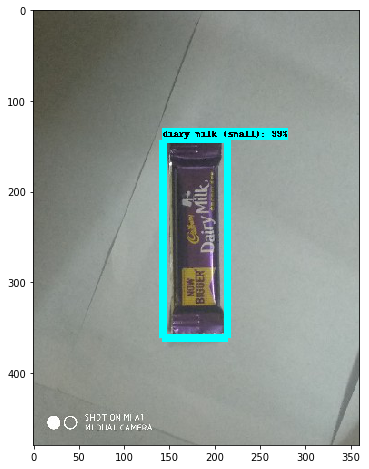

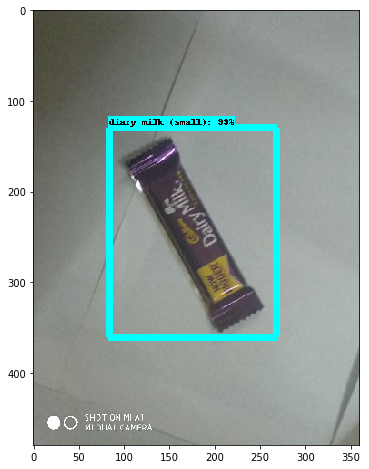

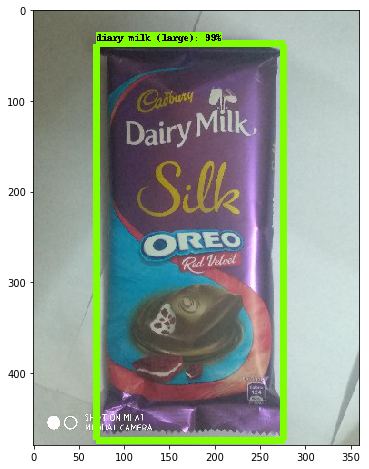

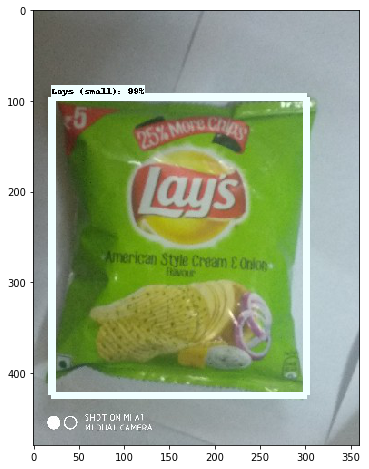

In [0]:
for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np_expanded, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)

In [0]:


cp -r /content/models/research/object_detection /gdrive/My\ Drive/Detected/Detection

In [0]:
!zip -r trained_model.zip edge_computing_model

  adding: edge_computing_model/ (stored 0%)
  adding: edge_computing_model/model.ckpt.index (deflated 70%)
  adding: edge_computing_model/model.ckpt.meta (deflated 94%)
  adding: edge_computing_model/pipeline.config (deflated 66%)
  adding: edge_computing_model/checkpoint (deflated 42%)
  adding: edge_computing_model/model.ckpt.data-00000-of-00001 (deflated 7%)
  adding: edge_computing_model/saved_model/ (stored 0%)
  adding: edge_computing_model/saved_model/saved_model.pb (deflated 9%)
  adding: edge_computing_model/saved_model/variables/ (stored 0%)
  adding: edge_computing_model/frozen_inference_graph.pb (deflated 9%)
